<a href="https://www.kaggle.com/code/captaindeadpool53/handwritten-digit-predictor-without-frameworks?scriptVersionId=147731031" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scipy


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%config Completer.use_jedi = False

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
%config Completer.use_jedi = False #For Autocomplete


In [3]:
trainingData = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# testData = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [4]:

trainingData = (np.array(trainingData))
# testData = (np.array(testData))

np.random.shuffle(trainingData)
# np.random.shuffle(testData)

trainingData = trainingData.T
# testData = testData.T

testData = trainingData[: , :1000]
trainingData = trainingData[: , 1000:]


n, m = trainingData.shape

trainingTargets = trainingData[0,:]
trainingPredictors = trainingData[1:,:]
trainingPredictors = trainingPredictors/255

testTargets = testData[0,:]
testPredictors = testData[1:,:]
testPredictors = testPredictors/255


In [5]:
class NeuralNetwork:
    def __init__(self, predictors, target, hiddenLayerNodes):
        self.predictors = predictors
        self.target = target
        self.n0, self.m = self.predictors.shape
        self.n1 = hiddenLayerNodes
        self.n2 = 10
        self.W1, self.B1, self.W2, self.B2 = [None] * 4 
        self.A1, self.Z1, self.A2, self.Z2 = [None] * 4
    
    def gradientDescent(self, iterations, alpha):
        self.initialiseWeightsAndBiases()
        
        for iteration in range(iterations):
            self.updateWeightsAndBiases(alpha)
            if(iteration%10 == 0):
#                 print("W1 = ",self.W1)
#                 print("W2 = ",self.W2)
#                 print("B1 = ",self.B1)
#                 print("B2 = ",self.B2)
                
                print(str(iteration) + " " + str(self.getAccuracy()))
            
    def initialiseWeightsAndBiases(self):
        self.W1 = np.random.rand(10, 784)-0.5
        self.W2 = np.random.rand(10, 10)-0.5
        self.B1 = np.zeros((10,1))-0.5
        self.B2 = np.zeros((10,1))-0.5
    
    def updateWeightsAndBiases(self, alpha):
        self.forwardPropagation()
        Y = self.getOneHot()
        
        DZ2 = self.A2 - Y
        DW2 = (1/self.m)*DZ2.dot(self.A1.T)
        DB2 = (1/self.m)*np.sum(DZ2,1).reshape(-1, 1)
        
        DZ1 = self.W2.T.dot(DZ2)*self.derivativeOfA1()
        DW1 = (1/self.m)*DZ1.dot(self.predictors.T)
        DB1 = (1/self.m)*np.sum(DZ1,1).reshape(-1, 1)
        
        self.W2 = self.W2 - alpha*DW2
        self.W1 = self.W1 - alpha*DW1
        self.B2 = self.B2 - alpha*DB2
        self.B1 = self.B1 - alpha*DB1
    
    def forwardPropagation(self):
        self.Z1 = self.W1.dot(self.predictors) + self.B1
        self.A1 = self.ReLU(self.sigmoid(self.Z1))
        self.Z2 = self.W2.dot(self.A1) + self.B2
        self.A2 = self.softmax(self.Z2 )
        
    def ReLU(self,Z):
        return np.maximum(Z, 0)
    
    def softmax(self,Z):
        Z = Z- np.max(Z,axis=0)
        return np.exp(Z)/np.sum(np.exp(Z), axis = 0)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def getOneHot(self):
        Y = np.zeros((10, self.m))
        Y[self.target, np.arange(self.m)] = 1
        return Y
    
    def derivativeOfA1(self):
        return self.sigmoid(self.Z1)>0
    
    def getPredictions(self,Y):
        return np.argmax(Y, 0)
    
    def getAccuracy(self):
        print("predictions" ,self.getPredictions(self.A2))
        return np.sum(self.getPredictions(self.A2)==self.target)/(self.target.size)
    
    def calculateTestAccuracy(self, testPredictors, testTarget):
        self.predictors = testPredictors
        self.target = testTarget
        
        self.forwardPropagation()
        
        print("Accuracy: " ,self.getAccuracy())
        
    def predictRandomExample(self):
        randomIndex = np.random.randint(0, self.predictors.shape[1])
        example = self.predictors[:, randomIndex].reshape(28, 28)
        
        plt.gray()
        plt.imshow(example)
        
        print("Target: ", self.target[randomIndex], " ")
        print("Prediction: ", self.getPredictions( self.A2[:, randomIndex]), " ")


In [6]:
nn =  NeuralNetwork(trainingPredictors, trainingTargets, 10 )
nn.gradientDescent(500, 1.8)


predictions [1 4 4 ... 4 0 7]
0 0.18453658536585366
predictions [1 8 2 ... 0 1 1]
10 0.4831463414634146
predictions [2 2 2 ... 0 1 1]
20 0.5272926829268293
predictions [2 8 2 ... 0 1 1]
30 0.601170731707317
predictions [2 8 2 ... 0 1 2]
40 0.6368780487804878
predictions [2 8 2 ... 0 1 2]
50 0.6585365853658537
predictions [2 8 2 ... 0 1 2]
60 0.6722926829268293
predictions [2 8 2 ... 0 1 2]
70 0.6827560975609757
predictions [2 8 2 ... 0 1 1]
80 0.6910243902439024
predictions [2 8 2 ... 0 1 3]
90 0.6945121951219512
predictions [2 8 2 ... 0 1 3]
100 0.6976341463414634
predictions [2 8 2 ... 0 1 3]
110 0.6999756097560975
predictions [2 8 2 ... 0 1 3]
120 0.700780487804878


/tmp/ipykernel_20/2454057104.py:61: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


predictions [2 8 2 ... 0 1 3]
130 0.7018780487804878
predictions [2 8 2 ... 0 1 3]
140 0.7033658536585365
predictions [2 8 2 ... 0 1 3]
150 0.7037073170731707
predictions [2 8 2 ... 0 3 3]
160 0.7036829268292683
predictions [2 8 2 ... 0 3 3]
170 0.7032195121951219
predictions [2 8 2 ... 0 3 3]
180 0.705780487804878
predictions [2 8 2 ... 0 3 3]
190 0.7060731707317073
predictions [2 8 2 ... 0 1 3]
200 0.7076829268292683
predictions [2 8 2 ... 0 1 3]
210 0.7090243902439024
predictions [2 8 2 ... 0 1 3]
220 0.7117560975609756
predictions [2 8 2 ... 0 1 3]
230 0.7132439024390244
predictions [2 8 2 ... 0 1 3]
240 0.7147073170731707
predictions [2 8 2 ... 0 1 1]
250 0.7155365853658536
predictions [2 8 2 ... 0 1 1]
260 0.7172682926829268
predictions [2 8 2 ... 0 1 1]
270 0.7217317073170731
predictions [2 8 2 ... 0 1 1]
280 0.720609756097561
predictions [2 8 2 ... 0 1 1]
290 0.7226585365853658
predictions [2 8 2 ... 0 1 1]
300 0.7248536585365853
predictions [2 8 2 ... 0 1 2]
310 0.727024390243

/tmp/ipykernel_20/2454057104.py:61: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


predictions [2 9 8 5 0 2 7 1 5 8 8 0 8 2 1 8 6 1 2 6 8 2 1 4 1 2 4 7 1 2 6 4 0 7 4 0 7
 8 6 7 2 7 7 8 6 2 2 0 7 8 1 5 3 2 7 1 8 4 5 0 7 6 8 4 3 7 9 0 8 3 0 1 1 3
 6 1 2 4 1 4 1 0 7 6 1 7 4 2 1 8 0 5 7 3 1 4 3 3 7 8 8 3 0 7 3 0 9 4 6 2 1
 0 5 2 3 8 1 1 3 3 1 3 2 7 1 7 1 2 1 7 3 8 6 3 4 8 4 8 6 1 1 2 2 1 3 5 5 3
 6 4 3 4 6 2 1 3 6 6 4 0 2 3 7 1 1 6 5 1 3 4 7 4 3 7 8 5 0 7 4 7 5 9 7 9 3
 1 3 6 0 1 2 4 8 4 0 2 4 5 6 9 7 8 1 1 1 1 5 1 4 1 5 1 2 6 8 6 5 0 7 2 3 7
 3 2 7 3 0 5 6 2 8 6 7 1 6 1 3 8 1 2 3 8 7 4 4 3 1 8 0 1 2 8 4 0 3 8 7 0 2
 9 8 3 4 2 0 8 3 2 3 5 3 2 5 8 3 8 7 1 8 7 9 2 5 0 3 5 6 7 8 8 8 5 8 8 6 8
 9 7 7 7 0 9 1 0 0 8 4 6 1 9 5 0 2 8 2 2 3 4 6 2 7 1 7 3 3 2 4 1 6 2 7 3 0
 9 1 3 0 0 8 0 1 6 8 7 4 8 0 8 8 9 7 4 8 9 9 9 4 8 1 7 7 3 0 7 7 0 9 1 1 7
 5 5 7 6 4 7 6 2 6 9 5 4 0 7 2 4 0 7 6 2 7 2 1 0 5 7 8 3 2 2 9 1 4 1 0 3 1
 2 3 1 3 8 6 2 7 2 4 1 6 8 3 6 6 5 2 4 7 2 0 0 4 1 1 6 3 8 3 8 3 6 7 0 0 1
 1 5 2 6 2 9 8 0 1 7 7 3 1 9 3 8 2 7 8 6 8 8 7 3 1 4 7 0 2 6 8 2 3 6 8 1 1
 3 2 9 6 0 3 

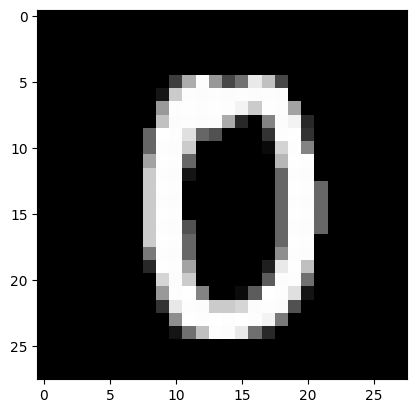

In [7]:
nn.calculateTestAccuracy( testPredictors, testTargets)
nn.predictRandomExample()
